In [1]:
import pandas as pd
import numpy as np
import itertools

#Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus
from IPython.display import Image

#Library for building machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection
import optuna
from optuna.integration import OptunaSearchCV
from xgboost import XGBClassifier

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

import matplotlib.pyplot as plt

from scipy.stats import loguniform, expon
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV

from sklearn import datasets
from sklearn import svm
from sklearn import metrics



In [2]:
loans = pd.read_csv("loan_approval_dataset.csv")
loans.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
loans.shape

(4269, 13)

In [4]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [5]:
loans.describe().round()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.0,4269.0,4269.0,4269.0,4269.0,4269.0,4269.0,4269.0,4269.0,4269.0
mean,2135.0,2.0,5059124.0,15133450.0,11.0,600.0,7472617.0,4973155.0,15126306.0,4976692.0
std,1232.0,2.0,2806840.0,9043363.0,6.0,172.0,6503637.0,4388966.0,9103754.0,3250185.0
min,1.0,0.0,200000.0,300000.0,2.0,300.0,-100000.0,0.0,300000.0,0.0
25%,1068.0,1.0,2700000.0,7700000.0,6.0,453.0,2200000.0,1300000.0,7500000.0,2300000.0
50%,2135.0,3.0,5100000.0,14500000.0,10.0,600.0,5600000.0,3700000.0,14600000.0,4600000.0
75%,3202.0,4.0,7500000.0,21500000.0,16.0,748.0,11300000.0,7600000.0,21700000.0,7100000.0
max,4269.0,5.0,9900000.0,39500000.0,20.0,900.0,29100000.0,19400000.0,39200000.0,14700000.0


In [6]:
loans.select_dtypes(include="object")

,education,self_employed,loan_status
0,Graduate,No,Approved
1,Not Graduate,Yes,Rejected
2,Graduate,No,Rejected
3,Graduate,No,Rejected
4,Not Graduate,Yes,Rejected
...,...,...,...
4264,Graduate,Yes,Rejected
4265,Not Graduate,Yes,Approved
4266,Not Graduate,No,Rejected
4267,Not Graduate,No,Approved


In [7]:
loans.columns = loans.columns.str.strip()
loans.drop("loan_id", axis=1, inplace=True)
loans.drop("cibil_score", axis=1, inplace=True) # Only consider 1st time applicants

loans['education'] = loans['education'].str.strip()
loans['self_employed'] = loans['self_employed'].str.strip()
loans['loan_status'] = loans['loan_status'].str.strip()

loans["education"] = loans["education"].replace({"Graduate" : 1, "Not Graduate" : 0})
loans["self_employed"] = loans["self_employed"].replace({"Yes" : 1, "No" : 0})
loans["loan_status"] = loans["loan_status"].replace({"Approved" : 1, "Rejected" : 0})

loans.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,2400000,17600000,22700000,8000000,1
1,0,0,1,4100000,12200000,8,2700000,2200000,8800000,3300000,0
2,3,1,0,9100000,29700000,20,7100000,4500000,33300000,12800000,0
3,3,1,0,8200000,30700000,8,18200000,3300000,23300000,7900000,0
4,5,0,1,9800000,24200000,20,12400000,8200000,29400000,5000000,0


loan_status
1    2656
0    1613
Name: count, dtype: int64


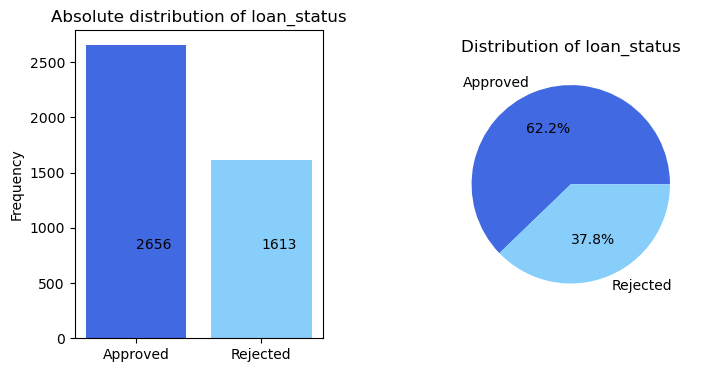

In [8]:
class_counts=loans["loan_status"].value_counts()
print(class_counts)

plt.figure(figsize=(8, 4))
           
plt.subplot(1,2,1)
plt.bar(["Approved", "Rejected"], class_counts, color = ["royalblue", "lightskyblue"])
plt.title("Absolute distribution of loan_status")
plt.ylabel("Frequency")
plt.text(["Approved"], class_counts[0]/2, class_counts[1])
plt.text(["Rejected"], class_counts[0]/2, class_counts[0])

plt.subplot(1,2,2)
plt.pie(class_counts, labels=["Approved", "Rejected"], autopct="%1.1f%%", colors= ["royalblue", "lightskyblue"])
plt.title("Distribution of loan_status")

plt.subplots_adjust(wspace=0.5)
plt.show()

In [9]:
X = loans.drop(["loan_status"], axis=1)
y = loans["loan_status"]

In [10]:
# One-hot encode no_of_dependents
X_onehot = pd.get_dummies(X, columns=["no_of_dependents"])

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_onehot)

# Split training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=1234, test_size=0.3)

In [11]:
smote = SMOTE(sampling_strategy='minority', random_state=1234)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train) #applied only to training

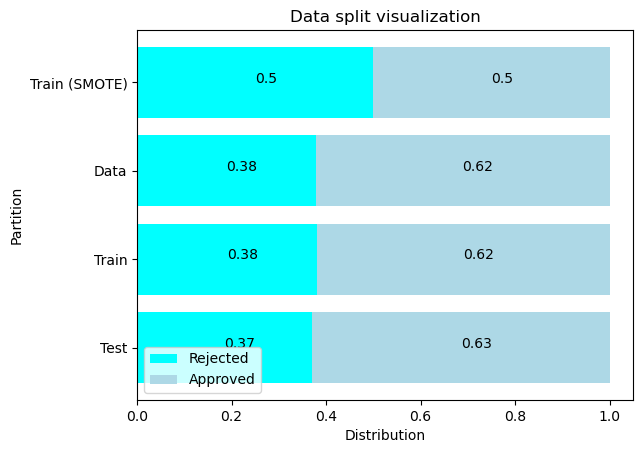

In [12]:
train_dist = y_train.value_counts() / len(y_train) #normalize absolute count values for plotting
test_dist = y_test.value_counts() / len(y_test)
loans_dist = loans["loan_status"].value_counts() / len(loans)
smote_dist = pd.Series(y_train_balanced).value_counts() / len(pd.Series(y_train_balanced))

fig, ax = plt.subplots()

ax.barh(['Test','Train','Data', 'Train (SMOTE)'], [ test_dist[0], train_dist[0], loans_dist[0], smote_dist[0]], color='cyan', label='Rejected')
ax.barh(['Test','Train','Data', 'Train (SMOTE)'], [ test_dist[1], train_dist[1], loans_dist[1], smote_dist[1]], left=[ test_dist[0], train_dist[0], loans_dist[0], smote_dist[0]], color='lightblue', label='Approved')
ax.set_title('Data split visualization')
ax.legend(loc='lower left')
plt.xlabel('Distribution')
plt.ylabel('Partition')

#plot bar values
for part, a, b in zip([ 'Test', 'Train','Data', 'Train (SMOTE)'], [ test_dist[0], train_dist[0], loans_dist[0], smote_dist[0]], [test_dist[1], train_dist[1], loans_dist[1], smote_dist[1]]):
    plt.text(a/2, part, str(np.round(a, 2)))
    plt.text(b/2+a, part, str(np.round(b, 2)));

## SVM

In [17]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))


Accuracy: 0.629976580796253
Precision: 0.629976580796253
Recall: 1.0


In [18]:
#Create a svm Classifier with Polynomial kernel.
clf_poly = svm.SVC(kernel='poly') #  Kernel polynomial
#Train the model using the training sets
clf_poly.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf_poly.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))


Accuracy: 0.6260733801717409
Precision: 0.6305732484076433
Recall: 0.9814126394052045


In [19]:
#Create a svm Classifier with Radial basis function kernel
clf_rbf = svm.SVC(kernel='rbf') # kernel Radial basis function 
#Train the model using the training sets
clf_rbf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf_rbf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))


Accuracy: 0.6291959406713505
Precision: 0.6305031446540881
Recall: 0.9938042131350682


In [20]:
#Create a svm Classifier with sigmoid kernel.
clf_sigmoid = svm.SVC(kernel='sigmoid') #  Kernel sigmoid
#Train the model using the training sets
clf_sigmoid.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf_sigmoid.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))


Accuracy: 0.5409836065573771
Precision: 0.6302021403091558
Recall: 0.6567534076827757


In [ ]:
#Create a svm Classifier with polynomial kernel
clf_sigmoid = svm.SVC(kernel='sigmoid') #  Kernel polynomial
#Train the model using the training sets
clf_sigmoid.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf_sigmoid.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))
